# Exercise Sheet 3
## Task 1b)

<IPython.core.display.Javascript object>


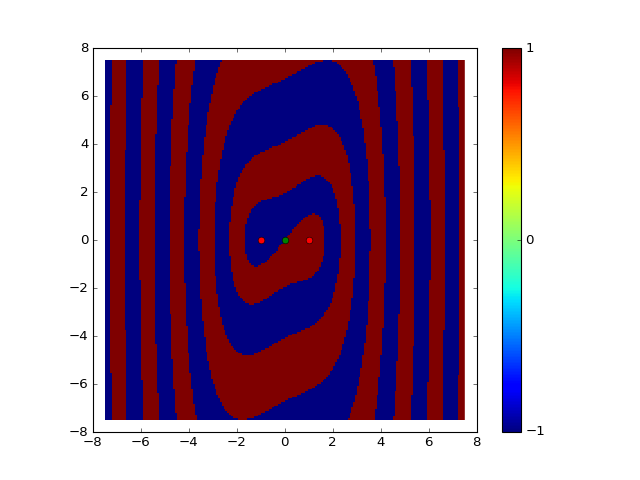

In [1]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib notebook

c = 0.5 #gamma
N = 200 #number of grid points
L = 15 #length of the grid

#system of ode
def f(t,x):
    x = x.reshape((N*N,2))
    temp = np.transpose(np.array([ x[:,1], -c * x[:,1] + x[:,0] - x[:,0]**3]))
    return temp.reshape((N*N*2))

#function for the integration
def Int(t0,x0, t1 = 100):
    r = ode(f).set_integrator('dopri5', nsteps=1000)  
    x0 = x0.reshape(N*N*2)
    r.set_initial_value(x0, t0)
    result = r.integrate(r.t+t1)
    return result.reshape(N,N,2)

#define the grid
X, Y = np.meshgrid(np.linspace(-L/2, L/2, N), np.linspace(-L/2, L/2, N))
grid = np.zeros((N, N, 2))
grid[:,:,0] = X
grid[:,:,1] = Y

#integrate
Z = Int(0,grid)

#plot all x-components of Z
fig, ax = plt.subplots()
cax = ax.imshow(Z[:,:,0], extent=[-L/2, L/2, -L/2, L/2], interpolation='none')
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])

# plot fixed points
plt.plot(0,0,'go')
plt.plot(1,0,'ro')
plt.plot(-1,0,'ro')

plt.show()

## Task: Integrate back in time

<IPython.core.display.Javascript object>


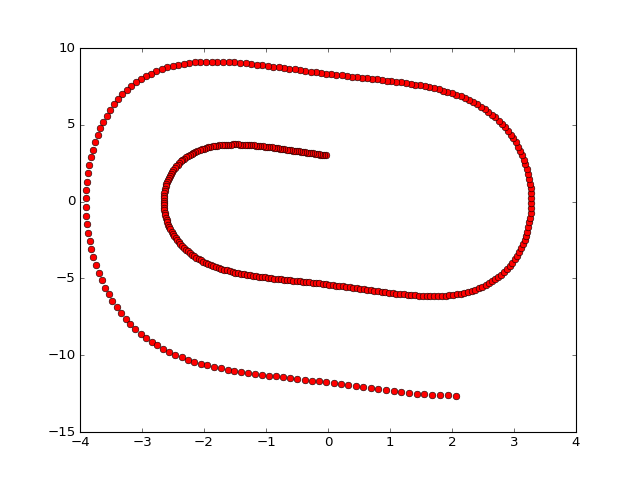

In [2]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
import numpy as np

c = 0.5 #gamma

def f(t,x):
    return np.array([ x[1], -c * x[1] + x[0] - x[0]**3])

def Int(t0,x0,style):
    r = ode(f).set_integrator('dopri5')
    r.set_initial_value( x0, t0)
    t1 = -4
    dt = -0.01
    
    while r.successful() and r.t > t1:
        temp = r.integrate(r.t+dt)
        plt.plot(temp[0], temp[1],style)

fig = plt.figure()
Int(0,[0,3],'ro')
plt.show()


## Task: Find stable manifold

<IPython.core.display.Javascript object>


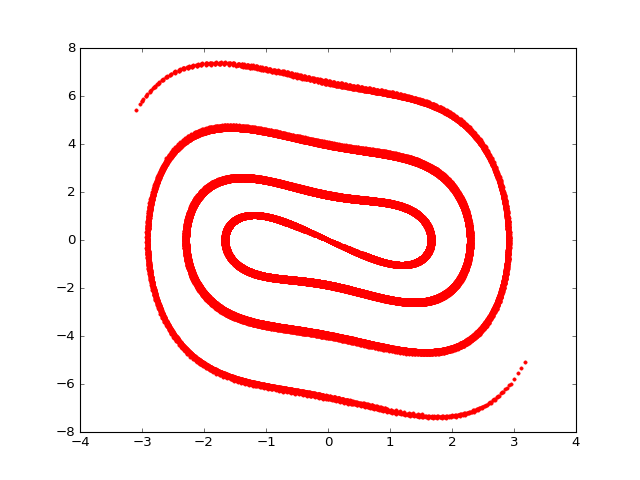

In [3]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

c = 0.5 #gamma
N = 100

def f(t,x):
    x = x.reshape((N,2))
    temp = np.transpose(np.array([ x[:,1], -c * x[:,1] + x[:,0] - x[:,0]**3]))
    return temp.reshape((2*N))

def Int(t0,x0):
    r = ode(f).set_integrator('dopri5')
    x0 = x0.reshape(2*N)
    r.set_initial_value( x0, t0)
    t1 = -6
    dt = -0.01
    
    result = np.zeros((1,2))
    while r.successful() and r.t > t1:
        temp = r.integrate(r.t+dt).reshape((N,2))
        result = np.concatenate((result,temp))
    return result[1:,:]

# calculate intitail values
v = np.array([1,-c/2 - np.sqrt((c**2)/4 +1)])
v = v/abs(v)
x = ((np.random.rand(N,1)*2-1)*v)


#integrate
stable_manifold = Int(0,x)

#plot
plt.figure()
plt.plot(stable_manifold[:,0],stable_manifold[:,1],'r.')
plt.show()


## Task: Plot together

<IPython.core.display.Javascript object>


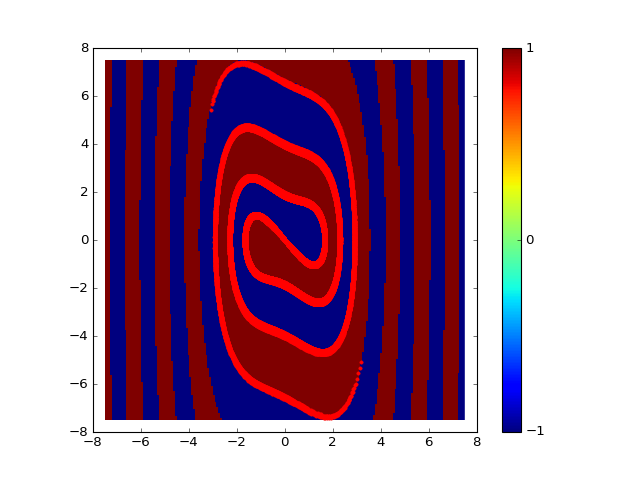

In [4]:
fig, ax = plt.subplots()
cax = ax.imshow(np.fliplr(Z[:,:,0]), extent=[-L/2, L/2, -L/2, L/2], interpolation='none')
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
ax.plot(stable_manifold[:,0],stable_manifold[:,1],'r.')
plt.show()